In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df=pd.read_excel('C:\\Users\\Shridatta\\Desktop\\Flight Prediction\\Data_Train.xlsx')

In [3]:
test_df=pd.read_excel('C:\\Users\\Shridatta\\Desktop\\Flight Prediction\\Test_set.xlsx')

In [4]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
final_df=train_df.append(test_df)
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [7]:
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


## Exploratory Data Analysis

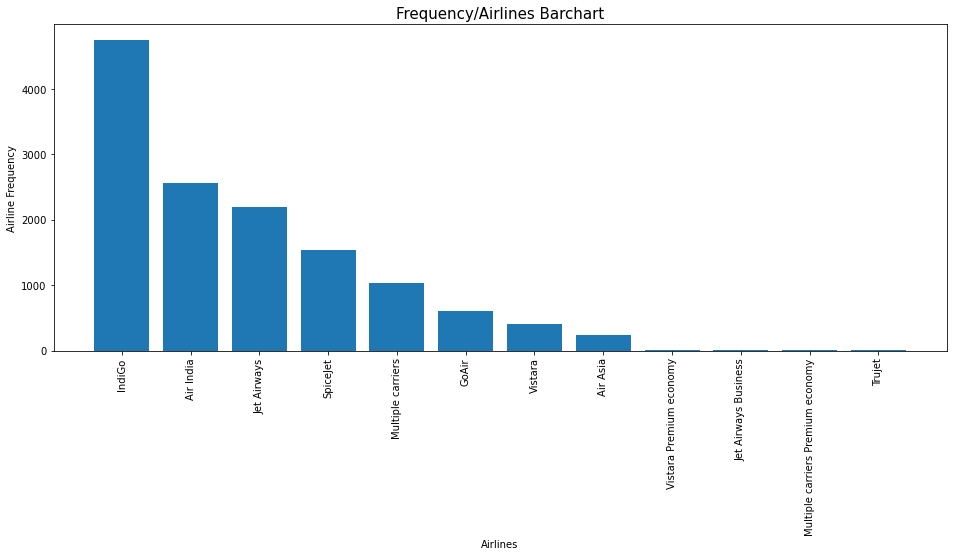

In [9]:
plt.figure(figsize=(16,6))
plt.bar(final_df.Airline.unique(), final_df.Airline.value_counts())
plt.title("Frequency/Airlines Barchart", fontsize=15)
plt.xlabel("Airlines")
plt.ylabel("Airline Frequency")
plt.xticks(rotation=90);

Observations:
    
    * Indigo Airline frequency is more compared to other Airlines.

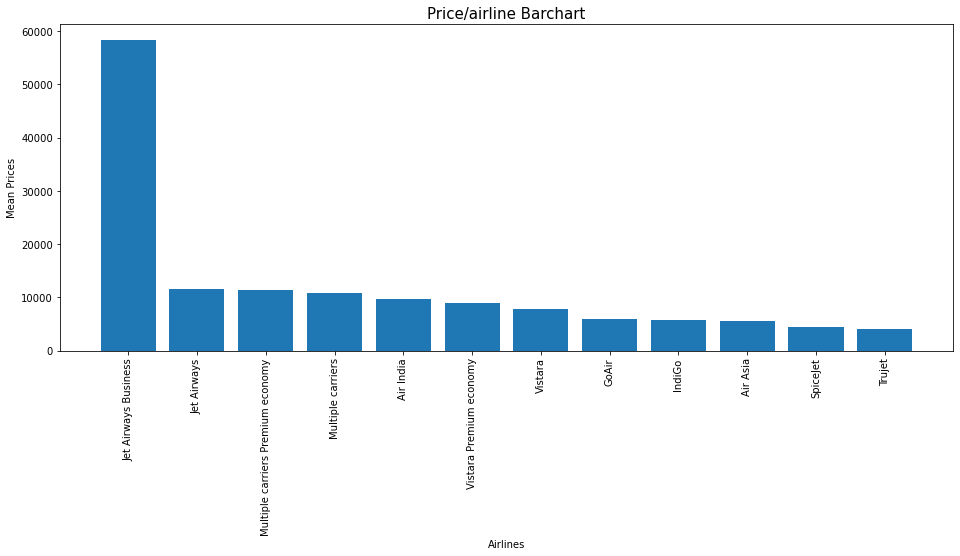

In [10]:
## Sorting series of airline prices (Grouped by airline)
grouped_airlines_by_prices = final_df.groupby('Airline')['Price'].mean().sort_values(ascending= False) 

## Plotting mean prices against airline
plt.figure(figsize=(16,6))
plt.bar(grouped_airlines_by_prices.index, grouped_airlines_by_prices.values) 
plt.title("Price/airline Barchart", fontsize=15)
plt.xlabel("Airlines")
plt.ylabel("Mean Prices")
plt.xticks(rotation=90);

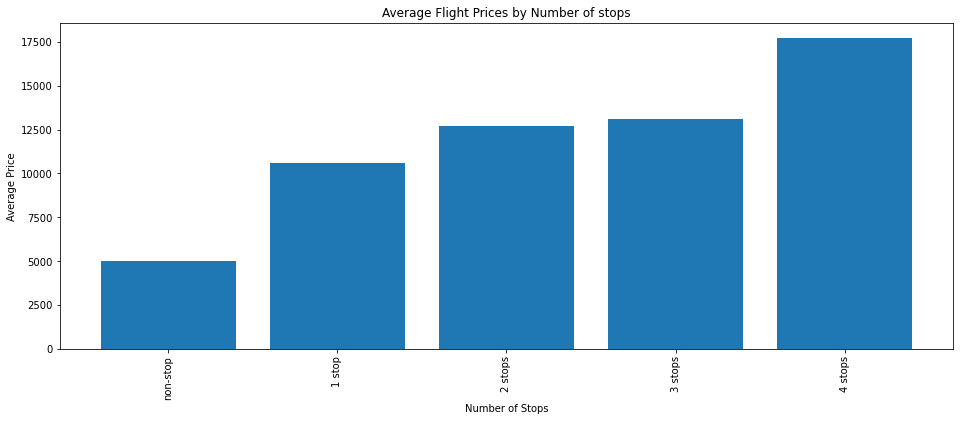

In [11]:
## Sorting series of total stops (Grouped by Total Stops)
stops = final_df.groupby('Total_Stops')['Price'].mean().round(0).sort_values(ascending= True)
plt.figure(figsize=(16,6))
plt.bar(stops.index, stops.values)
plt.title("Average Flight Prices by Number of stops")
plt.xlabel("Number of Stops")
plt.ylabel("Average Price")
plt.xticks(rotation=90);

Observations:
    
    * Flight prices increase when the number of stops increase.

## Feature Engineering

In [13]:
final_df['Date']=final_df.Date_of_Journey.str.split('/').str[0]
final_df['Month']=final_df.Date_of_Journey.str.split('/').str[1]
final_df['Year']=final_df.Date_of_Journey.str.split('/').str[2]

In [14]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [15]:
final_df['Year']=final_df['Year'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Date']=final_df['Date'].astype(int)

In [16]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [17]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)

In [18]:
final_df['Arrival_Time']=final_df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [19]:
final_df['Arrival_hour']=final_df['Arrival_Time'].apply(lambda x : x.split(':')[0])

In [20]:
final_df['Arrival_minutes']=final_df['Arrival_Time'].apply(lambda x : x.split(':')[1])

In [21]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_minutes']=final_df['Arrival_minutes'].astype(int)

In [22]:
final_df.drop('Arrival_Time',axis=1,inplace=True)

In [23]:
final_df['Dep_Time_hour']=final_df['Dep_Time'].apply(lambda x : x.split(':')[0])
final_df['Dep_Time_minutes']=final_df['Dep_Time'].apply(lambda x : x.split(':')[1])
final_df['Dep_Time_hour']=final_df['Dep_Time_hour'].astype(int)
final_df['Dep_Time_minutes']=final_df['Dep_Time_minutes'].astype(int)
final_df.drop('Dep_Time',axis=1,inplace=True)

In [24]:
final_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_Time_hour,Dep_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50


In [25]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [26]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'NaN':1})

In [27]:
final_df['duration_hour']=final_df['Duration'].str.split('h').str[0]

In [28]:
final_df[final_df['duration_hour']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_Time_hour,Dep_Time_minutes,duration_hour
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [29]:
final_df.drop('Route',axis=1,inplace=True)

In [30]:
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(2660,axis=0,inplace=True)

In [32]:
final_df['duration_hour']=final_df['duration_hour'].astype(int)

In [33]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_Time_hour,Dep_Time_minutes,duration_hour
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4


In [34]:
final_df['duration_min']=final_df['Duration'].str.split('h').str[1].str.split('m').str[0]

In [35]:
final_df['duration_min']=final_df['duration_min'].replace('',0)

In [36]:
final_df['duration_min']=final_df['duration_min'].astype(int)

In [37]:
final_df.drop('Duration',axis=1,inplace=True)

In [38]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_Time_hour,Dep_Time_minutes,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [39]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13351 non-null  object 
 1   Source            13351 non-null  object 
 2   Destination       13351 non-null  object 
 3   Total_Stops       13350 non-null  float64
 4   Additional_Info   13351 non-null  object 
 5   Price             10681 non-null  float64
 6   Date              13351 non-null  int32  
 7   Month             13351 non-null  int32  
 8   Year              13351 non-null  int32  
 9   Arrival_hour      13351 non-null  int32  
 10  Arrival_minutes   13351 non-null  int32  
 11  Dep_Time_hour     13351 non-null  int32  
 12  Dep_Time_minutes  13351 non-null  int32  
 13  duration_hour     13351 non-null  int32  
 14  duration_min      13351 non-null  int32  
dtypes: float64(2), int32(9), object(4)
memory usage: 1.2+ MB


In [40]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
label_encoder=LabelEncoder()

In [43]:
final_df['Airline']=label_encoder.fit_transform(final_df['Airline'])
final_df['Source']=label_encoder.fit_transform(final_df['Source'])
final_df['Destination']=label_encoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=label_encoder.fit_transform(final_df['Additional_Info'])

In [44]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_Time_hour,Dep_Time_minutes,duration_hour,duration_min
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2,50
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,7,25
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,19,0
3,3,3,0,1.0,8,6218.0,12,5,2019,23,30,18,5,5,25
4,3,0,5,1.0,8,13302.0,1,3,2019,21,35,16,50,4,45


In [45]:
pd.get_dummies(final_df,columns=["Airline", "Source", "Destination","Additional_Info"] ,drop_first = True)

,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_Time_hour,Dep_Time_minutes,duration_hour,...,Destination_5,Additional_Info_1,Additional_Info_2,Additional_Info_3,Additional_Info_4,Additional_Info_5,Additional_Info_6,Additional_Info_7,Additional_Info_8,Additional_Info_9
0,0.0,3897.0,24,3,2019,1,10,22,20,2,...,1,0,0,0,0,0,0,0,1,0
1,2.0,7662.0,1,5,2019,13,15,5,50,7,...,0,0,0,0,0,0,0,0,1,0
2,2.0,13882.0,9,6,2019,4,25,9,25,19,...,0,0,0,0,0,0,0,0,1,0
3,1.0,6218.0,12,5,2019,23,30,18,5,5,...,0,0,0,0,0,0,0,0,1,0
4,1.0,13302.0,1,3,2019,21,35,16,50,4,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,NaN,6,6,2019,20,25,20,30,23,...,0,0,0,0,0,0,0,0,1,0
2667,0.0,NaN,27,3,2019,16,55,14,20,2,...,0,0,0,0,0,0,0,0,1,0
2668,1.0,NaN,6,3,2019,4,25,21,50,6,...,0,0,0,0,0,0,0,0,1,0
2669,1.0,NaN,6,3,2019,19,15,4,0,15,...,0,0,0,0,0,0,0,0,1,0


In [46]:
final_df.drop(9039,axis=0,inplace=True)

In [47]:
df_train=final_df[~final_df['Price'].isnull()]

In [48]:
df_test=final_df[final_df['Price'].isnull()]

In [49]:
df_train.shape

(10680, 15)

In [50]:
df_test.drop('Price',axis=1,inplace=True)

C:\Users\Shridatta\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [51]:
df_test.shape

(2670, 14)

In [52]:
X=df_train.drop('Price',axis=1)
y=df_train['Price']

In [53]:
print(X.shape)
print(y.shape)

(10680, 14)
(10680,)


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [55]:
sc=StandardScaler()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Linear Regressor

In [58]:
lr_model=LinearRegression()

In [59]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [60]:
y_pred_lr=lr_model.predict(X_test)

In [61]:
y_pred_lr

array([ 9851.90211998, 10481.0548108 , 13057.16890347, ...,
       10480.9468862 ,  4447.43912349, 10369.16087635])

In [62]:
mean_absolute_error(y_test,y_pred_lr)

2412.833959120499

In [63]:
np.sqrt(mean_squared_error(y_test,y_pred_lr))

3405.701881445916

In [64]:
r2_score(y_test,y_pred_lr)

0.4451957336622856

## Random Forest

In [65]:
rt_model=RandomForestRegressor()
rt_model.fit(X_train,y_train)

RandomForestRegressor()

In [67]:
y_rt_pred=rt_model.predict(X_test)

In [68]:
mean_absolute_error(y_test,y_rt_pred)

688.1597213689068

In [69]:
np.sqrt(mean_squared_error(y_test,y_rt_pred))

1636.7677319053655

In [70]:
r2_score(y_test,y_rt_pred)

0.8718553017946293

## XGBoost

In [120]:
xgb_model=XGBRegressor(learning_rate=0.300000012,
              max_depth=6, 
              n_estimators=300, n_jobs=10,
             num_parallel_tree=1)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=10,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [121]:
y_xgb_pred=xgb_model.predict(X_test)

In [122]:
mean_absolute_error(y_test,y_xgb_pred)

729.1903693103114

In [123]:
np.sqrt(mean_squared_error(y_test,y_xgb_pred))

1509.814464293531

In [124]:
r2_score(y_test,y_xgb_pred)

0.8909630494897439

## Test Data

In [76]:
df_test

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_Time_hour,Dep_Time_minutes,duration_hour,duration_min
0,4,2,1,1.0,8,6,6,2019,4,25,17,30,10,55
1,3,3,0,1.0,8,12,5,2019,10,20,6,20,4,0
2,4,2,1,1.0,5,21,5,2019,19,0,19,15,23,45
3,6,2,1,1.0,8,21,5,2019,21,0,8,0,13,0
4,0,0,2,0.0,8,24,6,2019,2,45,23,55,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1.0,8,6,6,2019,20,25,20,30,23,55
2667,3,3,0,0.0,8,27,3,2019,16,55,14,20,2,35
2668,4,2,1,1.0,8,6,3,2019,4,25,21,50,6,35
2669,1,2,1,1.0,8,6,3,2019,19,15,4,0,15,15


In [125]:
lr_model.predict(df_test)

array([-1760.0047405 ,   747.95217269,  3047.99596285, ...,
         794.2126734 , 10944.27107108, -2443.44276136])

In [126]:
rt_model.predict(df_test)

array([18278.66, 19840.4 , 14737.8 , ..., 18278.66, 19186.12, 18278.66])

In [127]:
xgb_model.predict(df_test)

array([ 9299.533,  9817.082, 10068.338, ...,  9299.533, 11615.466,
        9299.533], dtype=float32)

In [128]:
import pickle

In [129]:
pickle.dump(xgb_model,open('xgb_reg_model.pkl','wb'))

In [130]:
pickle_model=pickle.load(open('xgb_reg_model.pkl','rb'))

In [131]:
pickle_model.predict(X_train[0].reshape(1,-1))

array([4170.8706], dtype=float32)